# Recurrent Neural Network - LSTM -  BTC

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
plt.style.use("ggplot")

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

Using TensorFlow backend.


### Loading the Data

In [19]:
df = pd.read_csv("BTC-USD.csv")

## Preprocessing Data

In [20]:
# Setting the datetime index as the date, only selecting the 'Close' column, then only the last 1000 closing prices.
df = df.set_index("Date")[['Close']].tail(1000)
df = df.set_index(pd.to_datetime(df.index))

# Normalizing/Scaling the Data
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [21]:
# Checking the newly formatted DataFrame
df.head()

,Close
Date,
2017-03-08,0.011448
2017-03-09,0.013522
2017-03-10,0.009655
2017-03-11,0.012840
2017-03-12,0.015294


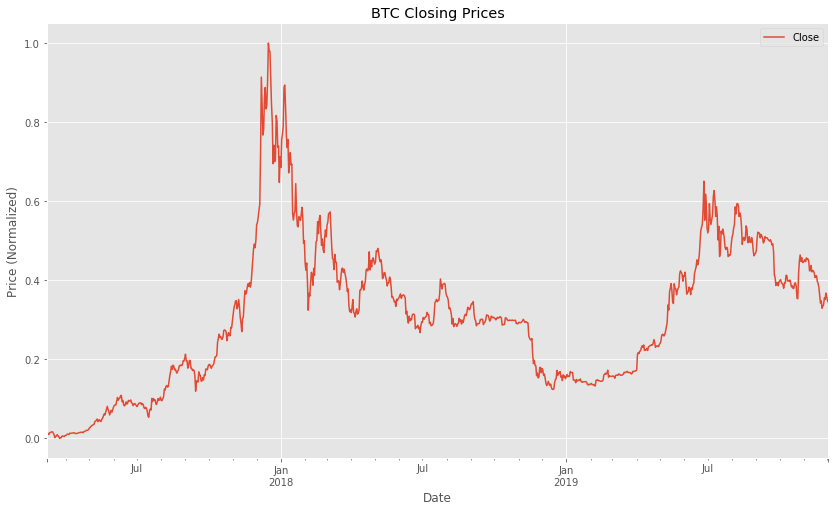

In [22]:
# Plotting the Closing Prices
df.plot(figsize=(14,8))
plt.title("BTC Closing Prices")
plt.ylabel("Price (Normalized)")
plt.show()

### Functions to prepare the data for LSTM

In [23]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [24]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [25]:
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

### Splitting the Data

In [26]:
# How many periods looking back to learn
n_per_in  = 30

# How many periods to predict
n_per_out = 10

# Features (in this case it's 1 because there is only one feature: price)
n_features = 1

# Splitting the data into appropriate sequences
X, y = split_sequence(list(df.Close), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
X = X.reshape((X.shape[0], X.shape[1], n_features))


## Modeling - LSTM (RNN)

### Creating the Neural Network

In [62]:
# Instatiating the model
model = Sequential()

# Activation
activ = "softsign"

# Input layer
model.add(LSTM(30, activation=activ, return_sequences=True, input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=6, n_nodes=12, activation=activ)

# Final Hidden layer
model.add(LSTM(10, activation=activ))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_68 (LSTM)               (None, 30, 30)            3840      
_________________________________________________________________
lstm_69 (LSTM)               (None, 30, 12)            2064      
_________________________________________________________________
lstm_70 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_71 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_72 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_73 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_74 (LSTM)               (None, 30, 12)          

In [63]:
# Compiling the data with selected specifications
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

### Fitting and Training the RNN

In [64]:
res = model.fit(X, y, epochs=800, batch_size=32, validation_split=0.1)

Train on 864 samples, validate on 97 samples
Epoch 1/800
864/864 [==============================] - 6s 7ms/step - loss: 0.0907 - accuracy: 0.0671 - val_loss: 0.0835 - val_accuracy: 0.0515
Epoch 2/800
864/864 [==============================] - 3s 4ms/step - loss: 0.0474 - accuracy: 0.0660 - val_loss: 0.0283 - val_accuracy: 0.0515
Epoch 3/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0353 - accuracy: 0.0764 - val_loss: 0.0188 - val_accuracy: 0.0722
Epoch 4/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0293 - accuracy: 0.0752 - val_loss: 0.0072 - val_accuracy: 0.0515
Epoch 5/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0163 - accuracy: 0.1123 - val_loss: 0.0030 - val_accuracy: 0.0722
Epoch 6/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0142 - accuracy: 0.0833 - val_loss: 0.0029 - val_accuracy: 0.0515
Epoch 7/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0125 - accuracy: 0.0

864/864 [==============================] - 2s 3ms/step - loss: 0.0028 - accuracy: 0.1343 - val_loss: 0.0045 - val_accuracy: 0.0825
Epoch 58/800
864/864 [==============================] - 3s 3ms/step - loss: 0.0029 - accuracy: 0.1412 - val_loss: 0.0029 - val_accuracy: 0.0722
Epoch 59/800
864/864 [==============================] - 3s 3ms/step - loss: 0.0027 - accuracy: 0.1574 - val_loss: 0.0028 - val_accuracy: 0.0825
Epoch 60/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0026 - accuracy: 0.1296 - val_loss: 0.0029 - val_accuracy: 0.0619
Epoch 61/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0027 - accuracy: 0.1574 - val_loss: 0.0031 - val_accuracy: 0.1443
Epoch 62/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0025 - accuracy: 0.1678 - val_loss: 0.0033 - val_accuracy: 0.0412
Epoch 63/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0027 - accuracy: 0.1400 - val_loss: 0.0029 - val_accuracy: 0.0928
Epoch

Epoch 114/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0015 - accuracy: 0.2106 - val_loss: 0.0034 - val_accuracy: 0.0309
Epoch 115/800
864/864 [==============================] - 3s 3ms/step - loss: 0.0016 - accuracy: 0.1736 - val_loss: 0.0034 - val_accuracy: 0.2680
Epoch 116/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0015 - accuracy: 0.1806 - val_loss: 0.0038 - val_accuracy: 0.1237
Epoch 117/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0015 - accuracy: 0.1968 - val_loss: 0.0033 - val_accuracy: 0.1340
Epoch 118/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0014 - accuracy: 0.1910 - val_loss: 0.0039 - val_accuracy: 0.2680
Epoch 119/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0014 - accuracy: 0.1968 - val_loss: 0.0042 - val_accuracy: 0.2474
Epoch 120/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0014 - accuracy: 0.1736 - val_loss: 0.0039 - val_ac

864/864 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 0.2164 - val_loss: 0.0036 - val_accuracy: 0.2577
Epoch 171/800
864/864 [==============================] - 3s 3ms/step - loss: 0.0011 - accuracy: 0.2188 - val_loss: 0.0035 - val_accuracy: 0.2784
Epoch 172/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 0.1829 - val_loss: 0.0033 - val_accuracy: 0.2887
Epoch 173/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 0.2245 - val_loss: 0.0030 - val_accuracy: 0.2680
Epoch 174/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0012 - accuracy: 0.1968 - val_loss: 0.0029 - val_accuracy: 0.3196
Epoch 175/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 0.2164 - val_loss: 0.0032 - val_accuracy: 0.2784
Epoch 176/800
864/864 [==============================] - 3s 3ms/step - loss: 0.0010 - accuracy: 0.2106 - val_loss: 0.0037 - val_accuracy: 0.2165

864/864 [==============================] - 3s 3ms/step - loss: 7.8978e-04 - accuracy: 0.2477 - val_loss: 0.0034 - val_accuracy: 0.2784
Epoch 226/800
864/864 [==============================] - 3s 3ms/step - loss: 9.6018e-04 - accuracy: 0.2546 - val_loss: 0.0035 - val_accuracy: 0.2474
Epoch 227/800
864/864 [==============================] - 3s 4ms/step - loss: 0.0011 - accuracy: 0.2674 - val_loss: 0.0033 - val_accuracy: 0.2784
Epoch 228/800
864/864 [==============================] - 3s 3ms/step - loss: 0.0012 - accuracy: 0.2396 - val_loss: 0.0031 - val_accuracy: 0.3402
Epoch 229/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 0.2593 - val_loss: 0.0038 - val_accuracy: 0.2887
Epoch 230/800
864/864 [==============================] - 2s 3ms/step - loss: 9.9190e-04 - accuracy: 0.2431 - val_loss: 0.0029 - val_accuracy: 0.2680
Epoch 231/800
864/864 [==============================] - 2s 3ms/step - loss: 9.5123e-04 - accuracy: 0.2465 - val_loss: 0.0033 - val_

864/864 [==============================] - 2s 3ms/step - loss: 7.2977e-04 - accuracy: 0.2720 - val_loss: 0.0036 - val_accuracy: 0.2268
Epoch 281/800
864/864 [==============================] - 2s 3ms/step - loss: 9.3227e-04 - accuracy: 0.2477 - val_loss: 0.0034 - val_accuracy: 0.2474
Epoch 282/800
864/864 [==============================] - 2s 3ms/step - loss: 8.9619e-04 - accuracy: 0.2894 - val_loss: 0.0034 - val_accuracy: 0.2371
Epoch 283/800
864/864 [==============================] - 3s 3ms/step - loss: 8.3995e-04 - accuracy: 0.2755 - val_loss: 0.0027 - val_accuracy: 0.2887
Epoch 284/800
864/864 [==============================] - 2s 3ms/step - loss: 8.2801e-04 - accuracy: 0.2928 - val_loss: 0.0024 - val_accuracy: 0.2680
Epoch 285/800
864/864 [==============================] - 2s 3ms/step - loss: 7.6229e-04 - accuracy: 0.2859 - val_loss: 0.0032 - val_accuracy: 0.2990
Epoch 286/800
864/864 [==============================] - 2s 3ms/step - loss: 6.9833e-04 - accuracy: 0.2697 - val_loss: 0

864/864 [==============================] - 3s 3ms/step - loss: 6.0720e-04 - accuracy: 0.2882 - val_loss: 0.0033 - val_accuracy: 0.2990
Epoch 336/800
864/864 [==============================] - 3s 3ms/step - loss: 6.5680e-04 - accuracy: 0.2755 - val_loss: 0.0031 - val_accuracy: 0.2784
Epoch 337/800
864/864 [==============================] - 3s 3ms/step - loss: 6.4309e-04 - accuracy: 0.2801 - val_loss: 0.0029 - val_accuracy: 0.2680
Epoch 338/800
864/864 [==============================] - 3s 3ms/step - loss: 6.5283e-04 - accuracy: 0.2720 - val_loss: 0.0030 - val_accuracy: 0.2887
Epoch 339/800
864/864 [==============================] - 3s 3ms/step - loss: 6.0114e-04 - accuracy: 0.2662 - val_loss: 0.0030 - val_accuracy: 0.2577
Epoch 340/800
864/864 [==============================] - 2s 3ms/step - loss: 7.8362e-04 - accuracy: 0.2697 - val_loss: 0.0051 - val_accuracy: 0.2577
Epoch 341/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 0.2500 - val_loss: 0.002

864/864 [==============================] - 3s 3ms/step - loss: 6.7145e-04 - accuracy: 0.2917 - val_loss: 0.0027 - val_accuracy: 0.2165
Epoch 391/800
864/864 [==============================] - 3s 3ms/step - loss: 7.4311e-04 - accuracy: 0.2731 - val_loss: 0.0044 - val_accuracy: 0.2474
Epoch 392/800
864/864 [==============================] - 3s 3ms/step - loss: 9.4822e-04 - accuracy: 0.2812 - val_loss: 0.0031 - val_accuracy: 0.2887
Epoch 393/800
864/864 [==============================] - 2s 3ms/step - loss: 6.2901e-04 - accuracy: 0.2905 - val_loss: 0.0032 - val_accuracy: 0.2784
Epoch 394/800
864/864 [==============================] - 3s 3ms/step - loss: 5.9385e-04 - accuracy: 0.2998 - val_loss: 0.0031 - val_accuracy: 0.2887
Epoch 395/800
864/864 [==============================] - 2s 3ms/step - loss: 5.6821e-04 - accuracy: 0.2951 - val_loss: 0.0030 - val_accuracy: 0.3299
Epoch 396/800
864/864 [==============================] - 2s 3ms/step - loss: 5.6364e-04 - accuracy: 0.2812 - val_loss: 0

864/864 [==============================] - 2s 3ms/step - loss: 5.5690e-04 - accuracy: 0.2894 - val_loss: 0.0034 - val_accuracy: 0.3093
Epoch 446/800
864/864 [==============================] - 2s 3ms/step - loss: 5.6304e-04 - accuracy: 0.2789 - val_loss: 0.0032 - val_accuracy: 0.2887
Epoch 447/800
864/864 [==============================] - 2s 3ms/step - loss: 5.3126e-04 - accuracy: 0.2812 - val_loss: 0.0033 - val_accuracy: 0.2784
Epoch 448/800
864/864 [==============================] - 2s 3ms/step - loss: 5.2968e-04 - accuracy: 0.2917 - val_loss: 0.0031 - val_accuracy: 0.2990
Epoch 449/800
864/864 [==============================] - 2s 3ms/step - loss: 5.2533e-04 - accuracy: 0.2870 - val_loss: 0.0033 - val_accuracy: 0.2680
Epoch 450/800
864/864 [==============================] - 2s 3ms/step - loss: 5.4695e-04 - accuracy: 0.2546 - val_loss: 0.0033 - val_accuracy: 0.2784
Epoch 451/800
864/864 [==============================] - 2s 3ms/step - loss: 5.7358e-04 - accuracy: 0.2963 - val_loss: 0

864/864 [==============================] - 2s 3ms/step - loss: 5.1982e-04 - accuracy: 0.2975 - val_loss: 0.0036 - val_accuracy: 0.3093
Epoch 501/800
864/864 [==============================] - 3s 3ms/step - loss: 5.1167e-04 - accuracy: 0.3125 - val_loss: 0.0033 - val_accuracy: 0.3093
Epoch 502/800
864/864 [==============================] - 2s 3ms/step - loss: 4.8696e-04 - accuracy: 0.2581 - val_loss: 0.0034 - val_accuracy: 0.3093
Epoch 503/800
864/864 [==============================] - 3s 3ms/step - loss: 4.8783e-04 - accuracy: 0.2847 - val_loss: 0.0034 - val_accuracy: 0.3093
Epoch 504/800
864/864 [==============================] - 2s 3ms/step - loss: 4.9872e-04 - accuracy: 0.2986 - val_loss: 0.0034 - val_accuracy: 0.2577
Epoch 505/800
864/864 [==============================] - 3s 3ms/step - loss: 5.0440e-04 - accuracy: 0.2720 - val_loss: 0.0035 - val_accuracy: 0.3093
Epoch 506/800
864/864 [==============================] - 2s 3ms/step - loss: 4.8086e-04 - accuracy: 0.2882 - val_loss: 0

864/864 [==============================] - 2s 3ms/step - loss: 6.2833e-04 - accuracy: 0.2674 - val_loss: 0.0035 - val_accuracy: 0.3608
Epoch 556/800
864/864 [==============================] - 2s 3ms/step - loss: 5.5313e-04 - accuracy: 0.2593 - val_loss: 0.0035 - val_accuracy: 0.3608
Epoch 557/800
864/864 [==============================] - 2s 3ms/step - loss: 4.7656e-04 - accuracy: 0.2847 - val_loss: 0.0032 - val_accuracy: 0.2784
Epoch 558/800
864/864 [==============================] - 2s 3ms/step - loss: 4.6196e-04 - accuracy: 0.2662 - val_loss: 0.0036 - val_accuracy: 0.3093
Epoch 559/800
864/864 [==============================] - 2s 3ms/step - loss: 4.6357e-04 - accuracy: 0.2928 - val_loss: 0.0033 - val_accuracy: 0.3093
Epoch 560/800
864/864 [==============================] - 2s 3ms/step - loss: 4.7299e-04 - accuracy: 0.2789 - val_loss: 0.0035 - val_accuracy: 0.3093
Epoch 561/800
864/864 [==============================] - 2s 3ms/step - loss: 4.6938e-04 - accuracy: 0.3009 - val_loss: 0

864/864 [==============================] - 2s 3ms/step - loss: 4.5630e-04 - accuracy: 0.2859 - val_loss: 0.0039 - val_accuracy: 0.2887
Epoch 611/800
864/864 [==============================] - 2s 3ms/step - loss: 4.4383e-04 - accuracy: 0.2986 - val_loss: 0.0036 - val_accuracy: 0.2990
Epoch 612/800
864/864 [==============================] - 2s 3ms/step - loss: 4.4331e-04 - accuracy: 0.2616 - val_loss: 0.0036 - val_accuracy: 0.3196
Epoch 613/800
864/864 [==============================] - 2s 3ms/step - loss: 4.5045e-04 - accuracy: 0.2859 - val_loss: 0.0035 - val_accuracy: 0.2990
Epoch 614/800
864/864 [==============================] - 2s 3ms/step - loss: 5.5378e-04 - accuracy: 0.2975 - val_loss: 0.0033 - val_accuracy: 0.3196
Epoch 615/800
864/864 [==============================] - 3s 3ms/step - loss: 4.9361e-04 - accuracy: 0.2604 - val_loss: 0.0037 - val_accuracy: 0.2990
Epoch 616/800
864/864 [==============================] - 3s 3ms/step - loss: 4.5471e-04 - accuracy: 0.3102 - val_loss: 0

864/864 [==============================] - 2s 3ms/step - loss: 5.3990e-04 - accuracy: 0.2801 - val_loss: 0.0036 - val_accuracy: 0.2371
Epoch 666/800
864/864 [==============================] - 2s 3ms/step - loss: 4.6940e-04 - accuracy: 0.2928 - val_loss: 0.0036 - val_accuracy: 0.2887
Epoch 667/800
864/864 [==============================] - 2s 3ms/step - loss: 4.4019e-04 - accuracy: 0.2847 - val_loss: 0.0040 - val_accuracy: 0.2680
Epoch 668/800
864/864 [==============================] - 2s 3ms/step - loss: 4.4406e-04 - accuracy: 0.2963 - val_loss: 0.0036 - val_accuracy: 0.3196
Epoch 669/800
864/864 [==============================] - 2s 3ms/step - loss: 4.2016e-04 - accuracy: 0.2847 - val_loss: 0.0037 - val_accuracy: 0.2990
Epoch 670/800
864/864 [==============================] - 2s 3ms/step - loss: 4.2103e-04 - accuracy: 0.2743 - val_loss: 0.0036 - val_accuracy: 0.2887
Epoch 671/800
864/864 [==============================] - 2s 3ms/step - loss: 4.1375e-04 - accuracy: 0.3252 - val_loss: 0

864/864 [==============================] - 2s 3ms/step - loss: 4.7331e-04 - accuracy: 0.3067 - val_loss: 0.0036 - val_accuracy: 0.2887
Epoch 721/800
864/864 [==============================] - 2s 3ms/step - loss: 3.9090e-04 - accuracy: 0.3056 - val_loss: 0.0038 - val_accuracy: 0.2680
Epoch 722/800
864/864 [==============================] - 2s 3ms/step - loss: 3.8165e-04 - accuracy: 0.3380 - val_loss: 0.0041 - val_accuracy: 0.2990
Epoch 723/800
864/864 [==============================] - 2s 3ms/step - loss: 3.7372e-04 - accuracy: 0.2674 - val_loss: 0.0034 - val_accuracy: 0.2577
Epoch 724/800
864/864 [==============================] - 2s 3ms/step - loss: 3.7645e-04 - accuracy: 0.3252 - val_loss: 0.0037 - val_accuracy: 0.3299
Epoch 725/800
864/864 [==============================] - 2s 3ms/step - loss: 3.7543e-04 - accuracy: 0.3021 - val_loss: 0.0035 - val_accuracy: 0.2990
Epoch 726/800
864/864 [==============================] - 2s 3ms/step - loss: 3.9643e-04 - accuracy: 0.2674 - val_loss: 0

864/864 [==============================] - 2s 3ms/step - loss: 3.4451e-04 - accuracy: 0.2824 - val_loss: 0.0035 - val_accuracy: 0.2784
Epoch 776/800
864/864 [==============================] - 2s 3ms/step - loss: 3.3560e-04 - accuracy: 0.3241 - val_loss: 0.0037 - val_accuracy: 0.1546
Epoch 777/800
864/864 [==============================] - 2s 3ms/step - loss: 3.3910e-04 - accuracy: 0.3009 - val_loss: 0.0036 - val_accuracy: 0.2990
Epoch 778/800
864/864 [==============================] - 3s 3ms/step - loss: 3.6528e-04 - accuracy: 0.2859 - val_loss: 0.0037 - val_accuracy: 0.1959
Epoch 779/800
864/864 [==============================] - 2s 3ms/step - loss: 3.4957e-04 - accuracy: 0.3252 - val_loss: 0.0038 - val_accuracy: 0.2165
Epoch 780/800
864/864 [==============================] - 2s 3ms/step - loss: 3.5301e-04 - accuracy: 0.3044 - val_loss: 0.0036 - val_accuracy: 0.2887
Epoch 781/800
864/864 [==============================] - 2s 3ms/step - loss: 3.7836e-04 - accuracy: 0.2928 - val_loss: 0

### Plotting the Accuracy and Loss

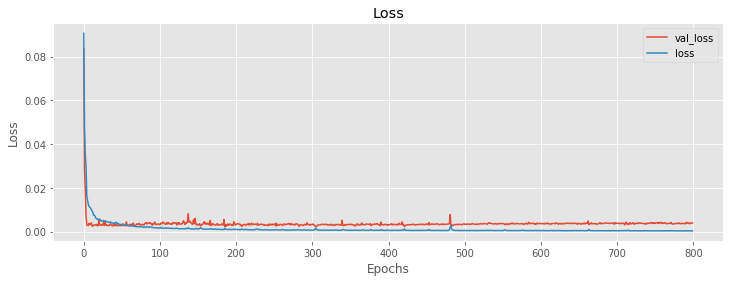

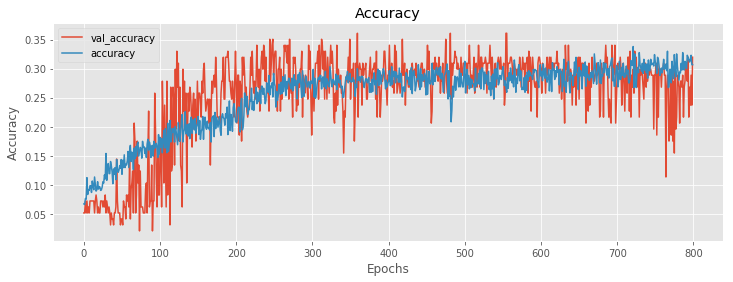

In [65]:
visualize_training_results(res)

## Visualizing the Predictions

### Validating the Model 
Plotting the difference between the Actual closing prices and the Predicted prices

Predicted Prices:
 [[7400.789307966416], [7241.380163940355], [7106.899924937646], [7172.888593383611], [7127.823633456216], [7228.137184418529], [7248.061391475402], [7264.6668333025145], [7504.581478017058], [7683.578527556711]]

Actual Prices:
 [[7397.796875], [7047.9169919999995], [7146.133789], [7218.371094], [7531.663573999999], [7463.105956999999], [7761.243651999999], [7569.629883], [7424.29248], [7321.988281]]


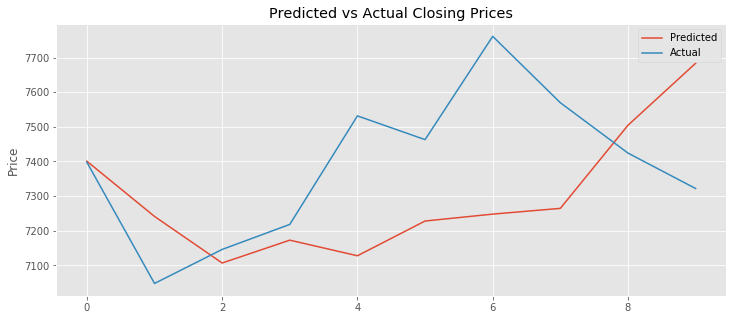

In [83]:
plt.figure(figsize=(12,5))

# Getting predictions by predicting from the last available X variable
yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming values back to their normal prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Getting the actual values from the last available y variable which correspond to its respective X variable
actual = scaler.inverse_transform(y[-1].reshape(-1,1))

# Printing and plotting those predictions
print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

# Printing and plotting the actual values
print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTC_validation.png")
plt.show()

### Predicting/Forecasting the future prices

                  Close
2019-12-02  7750.527979
2019-12-03  7993.556731
2019-12-04  8048.777666
2019-12-05  8293.133372
2019-12-06  8278.055115
2019-12-07  8168.779239
2019-12-08  7833.326193
2019-12-09  7327.463403
2019-12-10  7053.108825
2019-12-11  6831.816325


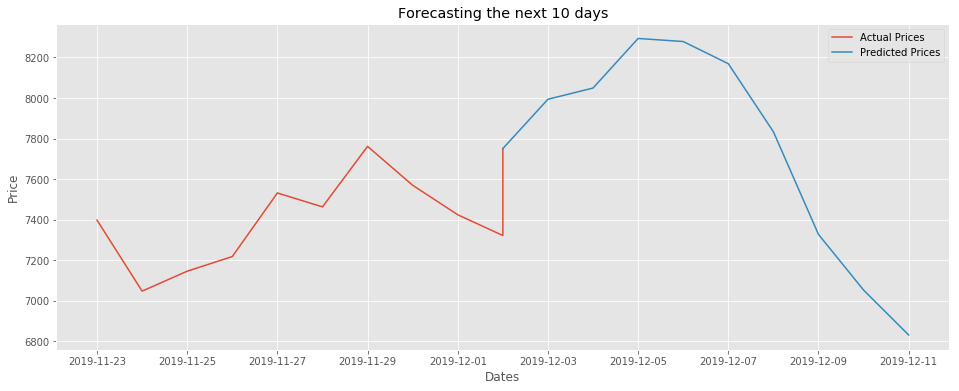

In [94]:
# Predicting off of y because it contains the most recent dates
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming the predicted values back to their original prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat), freq="D"), columns=df.columns)

# Printing the predicted prices
print(preds)

# Number of periods back to visualize the actual values
pers = 10

# Transforming the actual values to their original price
actual = pd.DataFrame(scaler.inverse_transform(df[["Close"]].tail(pers)), index=df.Close.tail(pers).index, columns=df.columns).append(preds.head(1))

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.savefig("BTC_predictions.png")
plt.show()